# Homework #3

# Problem 1: Obtain structured company data using Regex

In [1]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [1]:
import re
import pandas as pd

In [5]:
wiki_df = pd.read_csv('data/kdwd_r1k_articles.csv')
wiki_df.head(2)

,page_id,page_title,page_views,intro_text
0,856,Apple Inc.,190485,Apple Inc. is an American multinational techno...
1,2386,American Airlines,40829,"American Airlines, Inc. (AA) is a major Americ..."


### -) Write a regex to find unusually capitalized terms
Sometimes product names will have unusual capitalization such as iPhone or ThinkPad. Find a list of such terms and investigate if you think some of them are products.

In [11]:
maybe_products_ptn = r'\b[a-zA-Z]*[a-z][A-Z][a-zA-Z]*\b'  # updated pattern to include lowercase start

# code here!
maybe_products_set = set()
for text in wiki_df['intro_text']:
    maybe_products_set.update(re.findall(maybe_products_ptn, text))

print(len(maybe_products_set), 'terms found that are potential products')
print(maybe_products_set)

256 terms found that are potential products
{'UnionPay', 'CubeSmart', 'BioSpin', 'iLife', 'PowerTOP', 'PulteGroup', 'ProPublica', 'RingCentral', 'ThinkPad', 'CareFusion', 'McCann', 'HomeTeam', 'McKelvey', 'RenaissanceRe', 'DDoS', 'SaskTel', 'OkCupid', 'McVey', 'LogMeIn', 'NetScreen', 'SoHo', 'CityCenter', 'McGee', 'AirPods', 'SystemC', 'RiverSource', 'SoCs', 'SoftBank', 'SuperTarget', 'AbbVie', 'FreeStyle', 'PepsiCo', 'LinkedIn', 'AbioCor', 'MinuteClinic', 'McMaster', 'BioWare', 'BofA', 'McMoRan', 'FarmVille', 'FlexRigs', 'ServiceNow', 'jetBlue', 'SpectraSite', 'BankAmerica', 'WellCare', 'McCormick', 'GrafTech', 'tvOS', 'MitraClip', 'ExpertCity', 'LoRa', 'CoreSite', 'TransFund', 'iTunes', 'MidCap', 'ViacomCBS', 'MullenLowe', 'SoCalGas', 'OpenStack', 'FactSet', 'SeaTac', 'BellSouth', 'GeForce', 'kV', 'AmeriGas', 'VoIP', 'DoubleTree', 'ManpowerGroup', 'HoloLens', 'AmerisourceBergen', 'KGaA', 'SolarCity', 'HomeAway', 'IoT', 'FirstEnergy', 'AspenTech', 'FoodSaver', 'MiWi', 'eSignature', 'D

In [10]:
# verify that we found some of the key terms
assert('iPhone' in maybe_products_set)
assert('ThinkPad' in maybe_products_set)

### -) Parse company acquisition data from plain text

We are looking to identify the following types of patterns.<br />
`'Citrix acquired Sequoia Software Corp'`<br />
`'Moody\'s was acquired by Dun & Bradstreet in 1962.'`<br />
The idea here is to look for patterns around the word 'acquire' with two valid entities on either side, and an option year at the end.<br />
<span style="color:orange">Helpful Reminder:</span> you can create non-capturing capture groups via `(?:capture this|or that)`

In [36]:
# find a way to capture, 'FedEx', 'Coca-Cola', 'Sequoia Software Corp', 'Dun & Bradstreet' and 'Moody\'s'
company_ptn = r'\b(?:(?:[A-Z][a-z\']*)+|[A-Z]+)(?:(?:[ -](?:&|and)?[ -]?(?:(?:[A-Z][a-z\']*)+|[A-Z]+))*)(?: (?:Corporation|Corp|Group|Inc|LLC|Ltd|Software|Systems))?\b'

# code here!
maybe_companies_set = set()
for text in wiki_df['intro_text']:
    maybe_companies_set.update(re.findall(company_ptn, text))

print(len(maybe_companies_set), 'terms found that are potential companies')
print(maybe_companies_set)

6359 terms found that are potential companies
{'East West Bancorp Inc', 'Black & Decker', 'Loom', 'Mobil', 'Sara Lee', 'Founding', 'Financial Services', 'Pork', 'Fast Tech', 'Rayovac and Varta', 'On October', 'Green Building Council', 'Conshohocken', 'Wireless BLE Bluetooth Low-Energy and USB', 'Darden Restaurants Inc', 'ICE Clear Netherlands and ICE NGX', 'Robert Half', "Nature's Miracle", 'Southern California', 'Cotai', 'EA Vancouver', 'NOV', 'AMD', 'Hess', 'Phase I-IV', 'Old El Paso', 'Aerospace', 'Restasis', 'Permian Basin', 'Canada and Europe', 'Chevrolet', 'CEO Gil Amelio', 'Holden', 'Royal Vopak', 'Jeff Fettig', 'Scotland Group', 'HII', 'Private First Class Stuart S', 'Jack Dorsey', 'Intercontinental Exchange', 'BNP Paribas', 'Indiana and Virginia', "Tate's Bake Shop and Tang", 'Defense', 'Frost Bankers', 'Healthpeak Properties', 'LDS Church', 'Exploration and Production', 'Madison Square', 'NCR Global Headquarters', 'Broadcom Inc', 'MTN', 'Conversely', 'Quanta Services', 'NJ', 

In [41]:
# verify that we found some of the key terms
assert('FedEx' in maybe_companies_set)
assert('Coca-Cola' in maybe_companies_set)
assert('Sequoia Software Corp' in maybe_companies_set)
assert('Dun & Bradstreet' in maybe_companies_set)
assert('Moody\'s' in maybe_companies_set)

In [42]:
# acquisition pattern
acquisition_ptn = r'(?:acquired|was acquired by)'

# find a way to optionally capture the year such as ' in 1962'
optional_year_ptn = r'(?: in [12][0-9]{3}\b)?'

In [43]:
# let's assemble the patterns together to a full capture pattern
full_acquisition_pattern = (
    company_ptn + r'\s+' + acquisition_ptn + r'\s+' + company_ptn + optional_year_ptn
)

In [44]:
acquisition_strings = []
for _, row in wiki_df.iterrows():
    acquisition_strings.extend(re.findall(full_acquisition_pattern, row['intro_text']))
print(len(acquisition_strings), 'potential acquisitions found.')

22 potential acquisitions found.


In [45]:
# verify that we found some of the key terms
assert('Citrix acquired Sequoia Software Corp' in acquisition_strings)
assert('Moody\'s was acquired by Dun & Bradstreet in 1962' in acquisition_strings)

In [46]:
print(acquisition_strings)

['Citrix acquired Sequoia Software Corp', 'Citrix acquired Framehawk', 'Aflac acquired Continental American Insurance Company', 'Giannini acquired Banca', 'It was acquired by Avago Technologies in 2016', "Moody's was acquired by Dun & Bradstreet in 1962", 'Brookfield acquired Rouse Properties in 2016', 'Medtronic acquired Irish', 'ACE Limited acquired Chubb in 2016', 'Lottomatica acquired Gtech Corporation', 'CIT Group acquired OneWest Bank', 'Advance Auto Parts acquired Carport Auto Parts', 'Advance acquired Discount Auto Parts', 'Advance Auto Parts acquired BWP Distributors', 'Thermo Fisher acquired Life Technologies Corporation', 'Bell Atlantic acquired GTE', 'It was acquired by FIS', 'Keurig Green Mountain acquired Dr Pepper Snapple Group', 'Gendex Corporation acquired Dentsply International Inc', 'Sovran Self Storage acquired LifeStorage LP', "Novartis acquired Incyte's", 'Colfax acquired British Charter International PLC']


### -) Question: Are there any false positives in your results? If so, how could you account for them?

**ANSWER**

The following are false positives:
- It was acquired by Avago Technologies in 2016
- It was acquired by FIS
  
It is not a company name. We could account for these false positives by limiting the company names to be at least 3 characters long.

### -) Let's look into speed of regex matching

In [47]:
# write a simple pattern of your choice to search for in our dataset
search_ptn = r'iPhone'

In [48]:
# assemble a list of strings
doc_list = wiki_df['intro_text'].tolist()

In [50]:
%%timeit
# evaluation loop here
for doc in doc_list:
    re.search(search_ptn, doc)

570 µs ± 12.9 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


### Let's compile the regex and see if this increases the speed using `re.compile`

In [51]:
%%timeit
# evaluation loop here
compiled_search_ptn = re.compile(search_ptn)
for doc in doc_list:
    compiled_search_ptn.search(doc)

399 µs ± 4.26 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


### A note on speed: basic string operations are always faster than regex
#### show this using `'my_string' in 'other_string'`

In [54]:
%%timeit
# code here!
for doc in doc_list:
    if 'iPhone' in doc:
        pass

266 µs ± 2.82 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


# Problem 2: Word phrases

In this problem we will look at methods to identify valid n-grams such as 'New York' or 'Barack Obama' while eliminating statistical flukes such as `in the` or `i write`.

Preprocessing such as this can drastically improved embeddings since words can ngrams will often have a different meaning than the sum of its parts
 `V('united')` + `V('states')` != `V('united states')`
 `V('real')` + `V('estate')` != `V('real estate')`

In [3]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [4]:
import os
import json
import re

import numpy as np
import pandas as pd

In [5]:
wiki_df = pd.read_csv('data/kdwd_r1k_articles.csv')

### get consecutive unigrams for the 'intro_text' column of our dataset

In [6]:
# list of lists of unigrams
unigram_pattern = r'\b\w+\b'
corpus = [re.findall(unigram_pattern, doc.lower()) for doc in wiki_df['intro_text'].tolist()]
print(corpus)

[['apple', 'inc', 'is', 'an', 'american', 'multinational', 'technology', 'company', 'headquartered', 'in', 'cupertino', 'california', 'that', 'designs', 'develops', 'and', 'sells', 'consumer', 'electronics', 'computer', 'software', 'and', 'online', 'services', 'it', 'is', 'considered', 'one', 'of', 'the', 'big', 'four', 'tech', 'companies', 'along', 'with', 'amazon', 'google', 'and', 'facebook', 'the', 'company', 's', 'hardware', 'products', 'include', 'the', 'iphone', 'smartphone', 'the', 'ipad', 'tablet', 'computer', 'the', 'mac', 'personal', 'computer', 'the', 'ipod', 'portable', 'media', 'player', 'the', 'apple', 'watch', 'smartwatch', 'the', 'apple', 'tv', 'digital', 'media', 'player', 'the', 'airpods', 'wireless', 'earbuds', 'and', 'the', 'homepod', 'smart', 'speaker', 'apple', 's', 'software', 'includes', 'the', 'macos', 'ios', 'ipados', 'watchos', 'and', 'tvos', 'operating', 'systems', 'the', 'itunes', 'media', 'player', 'the', 'safari', 'web', 'browser', 'the', 'shazam', 'acou

### The package `gensim` has a convenient wrapper to obtain statistically significant ngrams/Phrase automatically

### we need to first `pip install gensim`
### `gensim` is a useful library for anything related to word representations and embeddings. It will come up a few more times. https://radimrehurek.com/gensim/index.html

In [29]:
from gensim.models.phrases import Phrases, Phraser, ENGLISH_CONNECTOR_WORDS

### Write some code to parse our corpus and use valid ngrams using `Phrases`

In [30]:
phrases = Phrases(corpus, min_count=5, threshold=10)

In [31]:
# vocab_count_dict = {k: v for k, v in phrases.vocab.items()}
# n_grams = ...
# https://www.educative.io/answers/what-is-gensimmodelsphrasesphrases-function

phraser = Phraser(phrases)
n_grams = []
for doc in corpus:
    transformed_doc = phraser[doc]
    phrase_list = [phrase.replace('_', ' ') for phrase in transformed_doc if '_' in phrase]
    n_grams.extend(phrase_list)

In [32]:
# print(n_grams.shape[0], 'n-grams found')
# n_grams.head(10)

# Sort the list and make it distinct
n_grams = sorted(set(n_grams))

# count the number of n-grams
print(len(n_grams), 'n-grams found')
print(n_grams)
# 529 n-grams found

529 n-grams found
['  notoc  ', '000 customers', '000 employees', '000 people', '1 3', '1 billion', '1 million', '1 nbsp', '100 000', '100 countries', '13 000', '16 000', '2 billion', '20 countries', '2000 list', '2018 fortune', '2019 fortune', '3 billion', '3 million', '31 2017', '31 2018', '31 2019', '4 million', '40 countries', '5 billion', '5 million', '500 index', '500 list', '500 rankings', '6 billion', '6 million', '7 billion', '7 million', '8 billion', '9 billion', '9 million', 'a broad', 'a component', 'a constituent', 'a major', 'a member', 'a portmanteau', 'a publicly', 'a real', 'a result', 'a separate', 'a suburb', 'a variety', 'a wide', 'according to', 'accounted for', 'acquired by', 'acquisition of', 'activision blizzard', 'addition to', 'admired companies', 'advance auto', 'after being', 'agreed to', 'along with', 'also known', 'also owns', 'also provides', 'american manufacturer', 'american multinational', 'american tower', 'american water', 'among others', 'an acronym

### How do the results look? Can you improve the results by excluding common terms using the `connector_words` kwarg of `Phrases`?

In [33]:
phrases = Phrases(corpus, min_count=5, threshold=10, connector_words=ENGLISH_CONNECTOR_WORDS)

In [34]:
for sentence in phrases[corpus]:
    print(sentence)

['apple', 'inc_is', 'an', 'american_multinational', 'technology', 'company', 'headquartered', 'in', 'cupertino', 'california', 'that_designs', 'develops', 'and', 'sells', 'consumer_electronics', 'computer', 'software', 'and', 'online', 'services', 'it_is', 'considered', 'one', 'of', 'the', 'big', 'four', 'tech', 'companies', 'along', 'with', 'amazon', 'google', 'and', 'facebook', 'the', 'company', 's', 'hardware', 'products_include', 'the', 'iphone', 'smartphone', 'the', 'ipad', 'tablet', 'computer', 'the', 'mac', 'personal_computer', 'the', 'ipod', 'portable', 'media', 'player', 'the', 'apple', 'watch', 'smartwatch', 'the', 'apple', 'tv', 'digital', 'media', 'player', 'the', 'airpods', 'wireless', 'earbuds', 'and', 'the', 'homepod', 'smart', 'speaker', 'apple', 's', 'software', 'includes', 'the', 'macos', 'ios', 'ipados', 'watchos', 'and', 'tvos', 'operating', 'systems', 'the', 'itunes', 'media', 'player', 'the', 'safari', 'web', 'browser', 'the', 'shazam', 'acoustic', 'fingerprint', 

In [35]:
# n_grams = ...

phraser = Phraser(phrases)
n_grams = []
for doc in corpus:
    transformed_doc = phraser[doc]
    phrase_list = [phrase.replace('_', ' ') for phrase in transformed_doc if '_' in phrase]
    n_grams.extend(phrase_list)

In [36]:
# print(n_grams.shape[0], 'n-grams found')
# n_grams.head(10)

# Sort the list and make it distinct
n_grams = sorted(set(n_grams))

# count the number of n-grams
print(len(n_grams), 'n-grams found')
print(n_grams)
# 481 n-grams found

481 n-grams found
['  notoc  ', '000 customers', '000 employees', '000 people', '1 3', '1 billion', '1 million', '1 nbsp', '100 000', '100 countries', '13 000', '16 000', '2 billion', '20 countries', '2000 list', '2018 fortune', '2019 fortune', '3 billion', '3 million', '31 2017', '31 2018', '31 2019', '4 million', '40 countries', '5 billion', '5 million', '500 index', '500 list', '500 rankings', '6 billion', '6 million', '7 billion', '7 million', '8 billion', '9 billion', '9 million', 'activision blizzard', 'admired companies', 'advance auto', 'after being', 'agreed to acquire', 'also known', 'also owns', 'also provides', 'american manufacturer', 'american multinational', 'american tower', 'american water', 'among others', 'analytical instruments', 'announced plans', 'announced that', 'annual revenue', 'annual revenues', 'any other', 'apartment units', 'approximately 5', 'april 2016', 'are located', 'are used', 'around the world', 'as a result', 'as of december', 'as of march', 'as pa

This was convenient, but it's also a black box where many of the knobs for tuning are actually broken in the newest version. Let's try to create our own solution for finding n-grams.

To do this, let's start by counting unigrams and bigrams within our corpus

Tip: use Counter for easy counting. It behaves similar to a dictionary with some added functionality around counting. such as `my_counter[unknown_key]` returning `0` for all unknown keys

In [37]:
from collections import Counter

unigram_counter = Counter()
bigram_counter = Counter()

for tokens in corpus:
    # your code here
    unigram_counter.update(tokens)
    bigram_counter.update(zip(tokens, tokens[1:]))

print("Top 10 unigrams:", unigram_counter.most_common(10))
print("Top 10 bigrams:", bigram_counter.most_common(10))

Top 10 unigrams: [('the', 4873), ('and', 4173), ('in', 3706), ('of', 2422), ('company', 1884), ('is', 1686), ('a', 1336), ('to', 1072), ('s', 958), ('as', 905)]
Top 10 bigrams: [(('the', 'company'), 999), (('in', 'the'), 711), (('of', 'the'), 577), (('is', 'a'), 411), (('is', 'an'), 403), (('united', 'states'), 393), (('an', 'american'), 365), (('headquartered', 'in'), 316), (('the', 'united'), 274), (('on', 'the'), 241)]


Now we need to come up with a score for each bigram that helps us decide on its importance and the fact of whether it is truly a bigram or two independent unigrams.

In [38]:
# your code here

bigram_df = pd.DataFrame(bigram_counter.items(), columns=['bigram', 'count'])
bigram_df = bigram_df.sort_values(by='count', ascending=False)
bigram_df.head(10)

,bigram,count
40,"(the, company)",999
710,"(in, the)",711
28,"(of, the)",577
637,"(is, a)",411
2,"(is, an)",403
1231,"(united, states)",393
3,"(an, american)",365
8,"(headquartered, in)",316
2243,"(the, united)",274
1292,"(on, the)",241


### Find ways to sort and filter your output to bigrams that make sense, such as `wells fargo`, `apple inc` or `puerto rico`

Option 1: Removing stopwords and limiting based on frequency and part of word

In [53]:
import nltk
from nltk.corpus import stopwords

nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

# Function to filter bigrams based on POS tags (Noun, Noun) or (Adjective, Noun)
def filter_bigrams_by_pos(bigrams):
    filtered_bigrams = []
    for bigram in bigrams:
        pos_tags = nltk.pos_tag(bigram)
        if (pos_tags[0][1].startswith('NN') and pos_tags[1][1].startswith('NN')) or \
           (pos_tags[0][1].startswith('JJ') and pos_tags[1][1].startswith('NN')):
            filtered_bigrams.append(bigram)
    return filtered_bigrams

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/bluebird/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/bluebird/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [69]:
# Get the list of stopwords
stop_words = set(stopwords.words('english'))

# Filter out bigrams containing a stopword
filtered_bigram_df = bigram_df[bigram_df['bigram'].apply(lambda x: x[0] not in stop_words and x[1] not in stop_words)]

# Remove any bigrams occurring less than 5 times
filtered_bigram_df = filtered_bigram_df[filtered_bigram_df['count'] >= 5]

# Reset index
filtered_bigram_df = filtered_bigram_df.reset_index(drop=True)

print(filtered_bigram_df.shape[0], 'bigrams found after stop word and frequency filtering')
filtered_bigram_df.head(20)

658 bigrams found after stop word and frequency filtering


,bigram,count
0,"(united, states)",393
1,"(new, york)",191
2,"(fortune, 500)",165
3,"(american, multinational)",92
4,"(real, estate)",91
5,"(natural, gas)",85
6,"(publicly, traded)",85
7,"(company, headquartered)",84
8,"(holding, company)",73
9,"(stock, exchange)",70


In [65]:
# Apply the POS filter
filtered_bigram_df['bigram'] = filtered_bigram_df['bigram'].apply(lambda x: tuple(x))
filtered_bigrams = filter_bigrams_by_pos(filtered_bigram_df['bigram'].tolist())

# Filter the dataframe based on the results
filtered_bigram_df = filtered_bigram_df[filtered_bigram_df['bigram'].isin(filtered_bigrams)]

In [68]:
print(filtered_bigram_df.shape[0], 'bigrams found after POS filtering')
filtered_bigram_df.head(20)

374 bigrams found after POS filtering


,bigram,count
0,"(united, states)",393
1,"(new, york)",191
3,"(american, multinational)",92
4,"(real, estate)",91
5,"(natural, gas)",85
9,"(stock, exchange)",70
10,"(financial, services)",66
11,"(york, city)",64
13,"(investment, trust)",58
15,"(estate, investment)",57


Option 2: Pointwise Mutual Information

Sources:
- https://dtunkelang.medium.com/let-bigrams-be-bigrams-aa6136d58fc2
- https://medium.com/@nicharuch/collocations-identifying-phrases-that-act-like-individual-words-in-nlp-f58a93a2f84a
- https://www.nltk.org/howto/collocations.html


In [89]:
from nltk.collocations import *

bigram_measures = nltk.collocations.BigramAssocMeasures()
tokens = nltk.word_tokenize(' '.join(wiki_df['intro_text'].tolist()))
print(tokens[:10])

['Apple', 'Inc.', 'is', 'an', 'American', 'multinational', 'technology', 'company', 'headquartered', 'in']


In [93]:
# Calculate bigrams
finder = BigramCollocationFinder.from_words(tokens)

# Filter for bigrams that occur at least 5 times
finder.apply_freq_filter(5)

# Remove stop words
finder.apply_word_filter(lambda w: w in stop_words)

# Convert finder to a dataframe with the pmi score
bigram_df = pd.DataFrame(list(finder.score_ngrams(bigram_measures.pmi)), columns=['bigram', 'pmi']).sort_values('pmi', ascending=False)

# Print the number of bigrams
print(bigram_df.shape[0], 'bigrams found')
bigram_df.head(20)

1405 bigrams found


,bigram,pmi
0,"(Dr, Pepper)",14.414117
1,"(Hewlett, Packard)",14.414117
2,"(Goldman, Sachs)",14.151083
4,"(Six, Flags)",14.151083
3,"(Hong, Kong)",14.151083
5,"(Foot, Locker)",13.928690
6,"(Merrill, Lynch)",13.928690
7,"(Sallie, Mae)",13.928690
8,"(Las, Vegas)",13.736045
9,"(Mountain, View)",13.736045


# Problem 3: Corporate Similarity and Returns

In this example we'll explore how to use NLP to measure corporate similarity

In particular we will
 - Make word vectors for firms in order to get an NLP measure of similarity
 - Measure the quality of this similarity metric by predicting future co-movement of returns. 
 
Step X: This problem uses a few concepts of basic modeling such as `sklearn.model_selection.train_test_split` and `sklearn.linear_model.LinearRegression`
 

$ \\ $
Step 0: Load the MD&A section from Form-10-K from 2016

In [91]:
import json
import pandas as pd

In [92]:
with open('data/parsed_mda.json') as f:
    data = json.load(f)

### Next, take only the first filing for each company

In [93]:
clean = []
seen = set()
for item in data:
    if item['ticker'] in seen:
        continue
    else:
        seen.add(item['ticker'])
        clean.append(item)
data = clean
del clean

In [94]:
print(data[0])

{'form': '10-K', 'company_name': 'ADOBE SYSTEMS INC', 'acc_id': 796343, 'date': '2016-01-19', 'filename': '0000796343-16-000224.txt', 'cik': '0000796343', 'full_filename': '/home/mikey/tmp/form10k/796343_0000796343-16-000224.txt', 'have_file': True, 'ticker': 'ADBE', 'mda': "ITEM 7.  MANAGEMENT’S DISCUSSION AND ANALYSIS OF FINANCIAL CONDITION AND RESULTS OF OPERATIONS\n\nTHE FOLLOWING DISCUSSION SHOULD BE READ IN CONJUNCTION WITH OUR CONSOLIDATED FINANCIAL STATEMENTS AND NOTES THERETO.\n\nACQUISITIONS\n\nDURING FISCAL 2015, WE COMPLETED OUR ACQUISITION OF PRIVATELY HELD FOTOLIA, A LEADING MARKETPLACE FOR ROYALTY-FREE PHOTOS, IMAGES, GRAPHICS AND HD VIDEOS, FOR\n\n$807.5 MILLION\n\n. DURING FISCAL 2015, WE INTEGRATED FOTOLIA INTO OUR DIGITAL MEDIA REPORTABLE SEGMENT.\n\nDURING FISCAL 2013, WE COMPLETED OUR ACQUISITIONS OF PRIVATELY HELD NEOLANE, A LEADER IN CROSS-CHANNEL CAMPAIGN MANAGEMENT TECHNOLOGY FOR\n\n$616.7 MILLION\n\n, AND PRIVATELY HELD BEHANCE, AN ONLINE SOCIAL MEDIA PLATFORM

In [95]:
print(data[0]['mda'][:500])

ITEM 7.  MANAGEMENT’S DISCUSSION AND ANALYSIS OF FINANCIAL CONDITION AND RESULTS OF OPERATIONS

THE FOLLOWING DISCUSSION SHOULD BE READ IN CONJUNCTION WITH OUR CONSOLIDATED FINANCIAL STATEMENTS AND NOTES THERETO.

ACQUISITIONS

DURING FISCAL 2015, WE COMPLETED OUR ACQUISITION OF PRIVATELY HELD FOTOLIA, A LEADING MARKETPLACE FOR ROYALTY-FREE PHOTOS, IMAGES, GRAPHICS AND HD VIDEOS, FOR

$807.5 MILLION

. DURING FISCAL 2015, WE INTEGRATED FOTOLIA INTO OUR DIGITAL MEDIA REPORTABLE SEGMENT.

DURING F


### Now load the price data for 2015-2018

In [96]:
prices = pd.read_csv(
    'data/sp500_prices.csv', 
    index_col=0, 
    parse_dates=True
).loc['2015-01-01':'2018-01-01']
prices.head()

,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,...,WLTW,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,152.857296,41.911850,59.166809,37.31,83.567918,19.647773,72.340,2.69,157.835250,12.207402,...,NaN,137.601094,32.876454,51.006224,40.568729,36.487373,48.740797,110.052964,27.623683,42.403000
2015-01-05,149.409947,41.921185,58.053335,37.07,82.156933,19.374481,71.980,2.66,155.754803,11.859892,...,NaN,135.259187,32.503272,49.893361,39.819696,34.216494,47.750487,114.158329,26.588649,42.148444
2015-01-06,147.816713,41.445126,57.765986,36.13,81.564320,19.013344,70.530,2.63,155.645306,11.592576,...,NaN,132.373957,32.676210,49.225643,39.247454,34.015277,47.164385,113.190639,25.573145,41.737240
2015-01-07,148.888186,41.781167,60.100691,37.28,83.276314,18.598525,71.110,2.58,158.989948,11.610397,...,NaN,136.261523,32.958372,49.856265,39.261411,34.283567,48.727324,116.005740,25.812374,42.598811
2015-01-08,152.456658,42.639940,60.729266,38.96,84.546201,18.788854,72.915,2.61,160.383549,11.788608,...,NaN,137.900858,33.340656,51.228796,40.136058,34.542275,49.576161,117.237350,26.178542,43.254780


In [97]:
data_tickers = [item['ticker'] for item in data]
assert len(data_tickers) == len(set(data_tickers)), 'non-unique tickers, this will not work'

In [98]:
print(len(data_tickers), 'unique tickers found in MDA data')
print(len(prices.index.unique()), 'tickers found in prices')

323 unique tickers found in MDA data
755 tickers found in prices


In [99]:
# List which tickers are missing in the mda json data that exist in the prices
missing_tickers = set(prices.columns) - set(data_tickers)
# Sort the missing tickers
missing_tickers = sorted(list(missing_tickers))
print('missing tickers:', missing_tickers)

missing tickers: ['AAL', 'AAPL', 'ABBV', 'ABMD', 'ABT', 'AGN', 'AIZ', 'AJG', 'AME', 'AON', 'AOS', 'APA', 'APD', 'APH', 'ARNC', 'ATVI', 'AVGO', 'AVY', 'AWK', 'AXP', 'AZO', 'BAX', 'BBT', 'BDX', 'BHGE', 'BLK', 'BLL', 'BXP', 'CAG', 'CBRE', 'CELG', 'CF', 'CHD', 'CI', 'CL', 'CLX', 'CMCSA', 'CMS', 'COF', 'COP', 'CPB', 'D', 'DD', 'DE', 'DG', 'DIS', 'DISCA', 'DISH', 'DLTR', 'DOW', 'DVA', 'DVN', 'DXC', 'ECL', 'EL', 'EQIX', 'EXC', 'EXPE', 'EXR', 'FBHS', 'FDX', 'FISV', 'FITB', 'FL', 'FLT', 'FOX', 'FOXA', 'FRC', 'FTI', 'FTV', 'GIS', 'GOOGL', 'GPC', 'GRMN', 'GS', 'HAS', 'HCA', 'HCP', 'HES', 'HON', 'HP', 'HPE', 'HRB', 'HRL', 'HST', 'IBM', 'INCY', 'INFO', 'IQV', 'JBHT', 'JEC', 'K', 'KEY', 'KIM', 'KR', 'L', 'LEN', 'LLL', 'LMT', 'LYB', 'MAR', 'MAS', 'MCO', 'MDLZ', 'MET', 'MGM', 'MLM', 'MMM', 'MNST', 'MOS', 'MS', 'MSCI', 'MSFT', 'MTB', 'NCLH', 'NEM', 'NKTR', 'NLSN', 'NOV', 'NTAP', 'NUE', 'NWS', 'NWSA', 'O', 'ORCL', 'PBCT', 'PCAR', 'PFG', 'PLD', 'PNC', 'PRGO', 'PWR', 'QCOM', 'REGN', 'RHI', 'RHT', 'RMD', '

## Step 1: clean the text
- Much of NLP boils down to doing reasonable processing on text.
- First, we'll try out very minimial processing

In [100]:
def clean_mda_simple(mda):
    return mda.lower()

In [101]:
# add import here
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# using no parameters for TfidfVectorizer for this simple example
vec = TfidfVectorizer() # default settings greatly decreases the correlation between returns and word similarities

In [102]:
# word_vecs = ...
word_vecs = vec.fit_transform((clean_mda_simple(item['mda']) for item in data))
print(word_vecs.shape)

(323, 24928)


## Step 2: Pairwise Word similarity
- Calculate the pairwise cosine similarity between word vectors
- Make the cosine similarities into a dataframe indexed/columned on ticker symbols

In [103]:
word_sims = cosine_similarity(word_vecs)
word_sims_df = pd.DataFrame(word_sims, index=data_tickers, columns=data_tickers)
print(word_sims_df.head())

          ADBE       AAP       AMD       AES       AMG       AFL       AIV  \
ADBE  1.000000  0.794595  0.809993  0.738847  0.771025  0.697476  0.617205   
AAP   0.794595  1.000000  0.835343  0.773859  0.798051  0.723132  0.647898   
AMD   0.809993  0.835343  1.000000  0.806705  0.826294  0.731263  0.652656   
AES   0.738847  0.773859  0.806705  1.000000  0.772338  0.716099  0.633811   
AMG   0.771025  0.798051  0.826294  0.772338  1.000000  0.709764  0.635551   

          AKAM   SO       ALK  ...       JCI        MU       RJF       ROK  \
ADBE  0.865301  0.0  0.740219  ...  0.757418  0.766076  0.776184  0.790667   
AAP   0.863385  0.0  0.761096  ...  0.787645  0.801146  0.801547  0.823923   
AMD   0.866758  0.0  0.786754  ...  0.814339  0.809757  0.810382  0.814448   
AES   0.821687  0.0  0.751233  ...  0.828628  0.776436  0.796716  0.776423   
AMG   0.846253  0.0  0.769998  ...  0.748867  0.763281  0.818221  0.793322   

          SWKS      SBUX      SNPS       TSN       TDG      VI

## Step 2a: Why `cosine_similarity` and not another measure?

Sources:
- https://medium.com/@arjunprakash027/understanding-cosine-similarity-a-key-concept-in-data-science-72a0fcc57599
- https://medium.com/@florvela/making-nlp-easy-simple-techniques-for-word-vectorization-and-cosine-similarity-e6ef94586f71
- https://www.datastax.com/guides/what-is-cosine-similarity

### ANSWER GOES HERE

- "Magnitude Independence: It focuses on the orientation of the vectors rather than their magnitude, making it robust to variations in document length and word frequency."
- "Normalization: It naturally normalizes the vectors, making it suitable for comparing documents of different sizes."
- "Interpretability: The cosine of the angle provides an easily interpretable measure of similarity."

## Step 3: Wrangle the price and word data
Our goal here is to have a dataframe which is indexed on PAIRS of tickers and has columns
 - `returns_correlation`: the correlation of returns for those two tickers from Jan 1 2016 to Jan 1 2017
 - `word_similarity`: the cosine similarity of the word vectors for the two companies' MD&A sections
 
Tips
 - NB: use pct_change to calculate returns in pandas
 - NB: use the pandas builtin corr function to calculate correlations (we don't need anything fancy)
 - NB: the index of the dataframe should have two columns (the tickers)

In [104]:
# one way you might do this is
# rets_cor = ... # calculate returns correlations
# word_cor = #  calcuate the word similarities in the right shape

# all_data = rets_cor.join(word_cor)
# all_data = all_data.dropna()
# all_data.head()

In [105]:
print(prices['MMM'].head(2))
# Manually check the percent change (old - new) / old
print((prices['MMM'].iloc[1] - prices['MMM'].iloc[0]) / prices['MMM'].iloc[0])

Date
2015-01-02    152.857296
2015-01-05    149.409947
Name: MMM, dtype: float64
-0.022552724612908567


In [106]:
# Calculate returns between Jan 1 2016 and Jan 1 2017
returns = prices.loc['2016-01-01':'2017-01-01'].pct_change()
#returns = prices.pct_change()
print(returns.head())

                 MMM       ABT      ABBV      ABMD       ACN      ATVI  \
Date                                                                     
2016-01-04       NaN       NaN       NaN       NaN       NaN       NaN   
2016-01-05  0.004359 -0.000233 -0.004166 -0.002816  0.005205 -0.012759   
2016-01-06 -0.020141 -0.008388  0.000174  0.003529 -0.001954 -0.009424   
2016-01-07 -0.024362 -0.023966 -0.002963 -0.039625 -0.029366 -0.014134   
2016-01-08 -0.003405 -0.020944 -0.027268  0.032471 -0.009681 -0.015440   

                ADBE       AMD       AAP       AES  ...      WLTW      WYNN  \
Date                                                ...                       
2016-01-04       NaN       NaN       NaN       NaN  ...       NaN       NaN   
2016-01-05  0.004023 -0.007220 -0.006831  0.013786  ...       NaN  0.018904   
2016-01-06 -0.014295 -0.089091 -0.026455 -0.034519  ... -0.046567 -0.051805   
2016-01-07 -0.020984 -0.091816  0.011073 -0.024919  ... -0.041924 -0.094070   
2016-01

/var/folders/tl/1_9jjfjj3wb0nqls4mbmjchw0000gn/T/ipykernel_34104/4031409078.py:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = prices.loc['2016-01-01':'2017-01-01'].pct_change()


In [107]:
# Calculate the correlation matrix for returns
rets_cor = returns.corr()
print(rets_cor.head())

           MMM       ABT      ABBV      ABMD       ACN      ATVI      ADBE  \
MMM   1.000000  0.388121  0.240860  0.249482  0.447164  0.292491  0.431371   
ABT   0.388121  1.000000  0.434728  0.392018  0.382333  0.340372  0.433040   
ABBV  0.240860  0.434728  1.000000  0.313743  0.190497  0.211534  0.320422   
ABMD  0.249482  0.392018  0.313743  1.000000  0.435299  0.395632  0.512213   
ACN   0.447164  0.382333  0.190497  0.435299  1.000000  0.415899  0.550949   

           AMD       AAP       AES  ...      WLTW      WYNN       XEL  \
MMM   0.133798  0.280127  0.486248  ...  0.509104  0.258648  0.222444   
ABT   0.221818  0.311918  0.296081  ...  0.332612  0.210723  0.024405   
ABBV  0.106552  0.170192  0.157466  ...  0.282591  0.213532 -0.079174   
ABMD  0.161933  0.229582  0.222980  ...  0.365390  0.266591  0.061514   
ACN   0.211802  0.238929  0.348189  ...  0.507111  0.241807  0.167244   

           XRX      XLNX       XYL       YUM       ZBH      ZION       ZTS  
MMM   0.438878 

In [108]:
# Reshape the word similarities dataframe
word_cor = word_sims_df.stack().reset_index()
word_cor.columns = ['ticker1', 'ticker2', 'word_similarity']
print(word_cor.head())

  ticker1 ticker2  word_similarity
0    ADBE    ADBE         1.000000
1    ADBE     AAP         0.794595
2    ADBE     AMD         0.809993
3    ADBE     AES         0.738847
4    ADBE     AMG         0.771025


In [109]:
# Reshape the returns correlation dataframe to have a MultiIndex with pairs of tickers
rets_cor = rets_cor.stack().reset_index()
rets_cor.columns = ['ticker1', 'ticker2', 'returns_correlation']
print(rets_cor.head())

  ticker1 ticker2  returns_correlation
0     MMM     MMM             1.000000
1     MMM     ABT             0.388121
2     MMM    ABBV             0.240860
3     MMM    ABMD             0.249482
4     MMM     ACN             0.447164


In [110]:
# Check the return correlation for ACN and ADBE
rets_cor[(rets_cor['ticker1'] == 'ACN') & (rets_cor['ticker2'] == 'ADBE')]

,ticker1,ticker2,returns_correlation
1934,ACN,ADBE,0.550949


In [111]:
# Merge the two dataframes on ticker pairs
all_data = pd.merge(rets_cor, word_cor, on=['ticker1', 'ticker2'])

# Remove rows where the tickers are the same and drop any missing values
all_data = all_data[all_data['ticker1'] != all_data['ticker2']]
all_data = all_data.dropna()

all_data.head()

,ticker1,ticker2,returns_correlation,word_similarity
1,ACN,ADBE,0.550949,0.829395
2,ACN,AMD,0.211802,0.787571
3,ACN,AAP,0.238929,0.784119
4,ACN,AES,0.348189,0.753118
5,ACN,AMG,0.507414,0.754781


In [112]:
print(all_data.shape)
print(all_data['ticker1'].nunique(), 'unique tickers')

(100806, 4)
318 unique tickers


## Step 3a: 
 - What is the contemperaneous correlation of these data?
 - Make a scatter plot of the returns correlation and word similarities

In [113]:
# all_data.corr()

In [114]:
# Calculate the contemporaneous correlation
print(all_data['returns_correlation'].corr(all_data['word_similarity']))

0.11448917487916994


In [115]:
## This should be about 12%. That's not bad, but we can do better

<Axes: xlabel='returns_correlation', ylabel='word_similarity'>

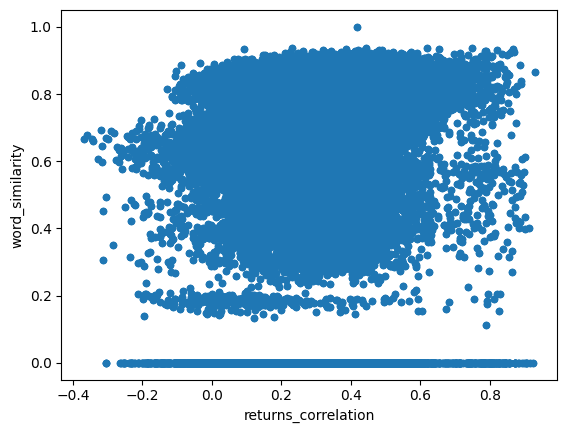

In [116]:
all_data.plot.scatter(x='returns_correlation', y='word_similarity')

## Part 4: Try to predict the future returns correlations
- Use OLS (`LinearRegression`) to predict `returns_correlation` from `word_similarity`. 
- What is the (contemperaneous) out of sample performance?

In [117]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [118]:
data_df =  all_data.copy()
feature_cols =  ['word_similarity']
target_col =  'returns_correlation'

X = data_df[feature_cols] # independent variables
y = data_df[target_col] # dependent variable

print(X.shape, y.shape)
print(X.head())
print(y.head())

(100806, 1) (100806,)
   word_similarity
1         0.829395
2         0.787571
3         0.784119
4         0.753118
5         0.754781
1    0.550949
2    0.211802
3    0.238929
4    0.348189
5    0.507414
Name: returns_correlation, dtype: float64


In [119]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(70564, 1) (30242, 1) (70564,) (30242,)


In [120]:
# Train the model
reg = LinearRegression()
reg.fit(X_train, y_train)

# Evaluate the model
score = reg.score(X_test, y_test)
coefficients = pd.Series(reg.coef_, index=feature_cols)

print(f'Out of sample performance (R^2 score): {score}')
print('Coefficients:')
print(coefficients)

Out of sample performance (R^2 score): 0.014597806451352668
Coefficients:
word_similarity    0.06496
dtype: float64


This is not amazing. We can do better!

## Part 5: Repeat, but be careful
Here we will see if we can clean the data better

Things to try
 - Look at the histograms of word similarities to see if we can "ignore" some ill-behaved data
 - Try limiting how greedy the `TFIDFVectorizer` is: `min_df`, `max_df`, `max_features`, etc.
 
We will examine our data and look for things that look out of place
 - We will ultimately want our data to look normally distributed


In [121]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

In [122]:
def clean_mda(mda):
    paras = [p.lower() for p in mda.split('\n') if len(p) > 40]
    cleaned =  ' '.join(paras)
    words = cleaned.split()
    words = [word for word in words if len(word) > 2]
    if len(words) > 10:
        return ' '.join(words)
    else:
        return ''

In [123]:
# Limit the TFIDFVectorizer
vec = TfidfVectorizer(
    min_df=3,
    max_df=1.0
)
word_vecs = vec.fit_transform((clean_mda(item['mda']) for item in data))

In [124]:
word_sims = cosine_similarity(word_vecs)
word_sims_df = pd.DataFrame(word_sims, index=data_tickers, columns=data_tickers)
print(word_sims.shape) # (323, 323)

(323, 323)


In [125]:
# Lots of word similarities are all zeros- so we'll ignore
# add code here to remove rows of word_sims where all the elements are zero
non_zero_indices = np.any(word_sims != 0, axis=1)
word_sims = word_sims[non_zero_indices][:, non_zero_indices]

In [126]:
# Recalculate the returns correlation and the cosine similarities
word_sims_df = pd.DataFrame(word_sims, index=np.array(data_tickers)[non_zero_indices], columns=np.array(data_tickers)[non_zero_indices])
print(word_sims_df.shape) # (300, 300)
#print(word_sims_df.head())

(300, 300)


In [127]:
rets_cor = returns.corr()
print(rets_cor.shape)
#print(rets_cor.head())

(494, 494)


In [128]:
# Reshape the word similarities dataframe
word_cor = word_sims_df.stack().reset_index()
word_cor.columns = ['ticker1', 'ticker2', 'word_similarity']
print(word_cor.head())

  ticker1 ticker2  word_similarity
0    ADBE    ADBE         1.000000
1    ADBE     AAP         0.778558
2    ADBE     AMD         0.774899
3    ADBE     AES         0.733078
4    ADBE     AMG         0.716311


In [129]:
# Reshape the returns correlation dataframe
rets_cor = rets_cor.stack().reset_index()
rets_cor.columns = ['ticker1', 'ticker2', 'returns_correlation']
print(rets_cor.head())

  ticker1 ticker2  returns_correlation
0     MMM     MMM             1.000000
1     MMM     ABT             0.388121
2     MMM    ABBV             0.240860
3     MMM    ABMD             0.249482
4     MMM     ACN             0.447164


In [130]:
# Merge the two dataframes on ticker pairs
all_data = pd.merge(rets_cor, word_cor, on=['ticker1', 'ticker2'])

# Remove rows where the tickers are the same and drop any missing values
all_data = all_data[all_data['ticker1'] != all_data['ticker2']]
all_data = all_data.dropna()
all_data.head()

,ticker1,ticker2,returns_correlation,word_similarity
1,ACN,ADBE,0.550949,0.797598
2,ACN,AMD,0.211802,0.775307
3,ACN,AAP,0.238929,0.778956
4,ACN,AES,0.348189,0.784401
5,ACN,AMG,0.507414,0.709525


In [131]:
print(all_data['returns_correlation'].corr(all_data['word_similarity']))

0.136933936873183


Text(0.5, 1.0, 'Returns Correlation')

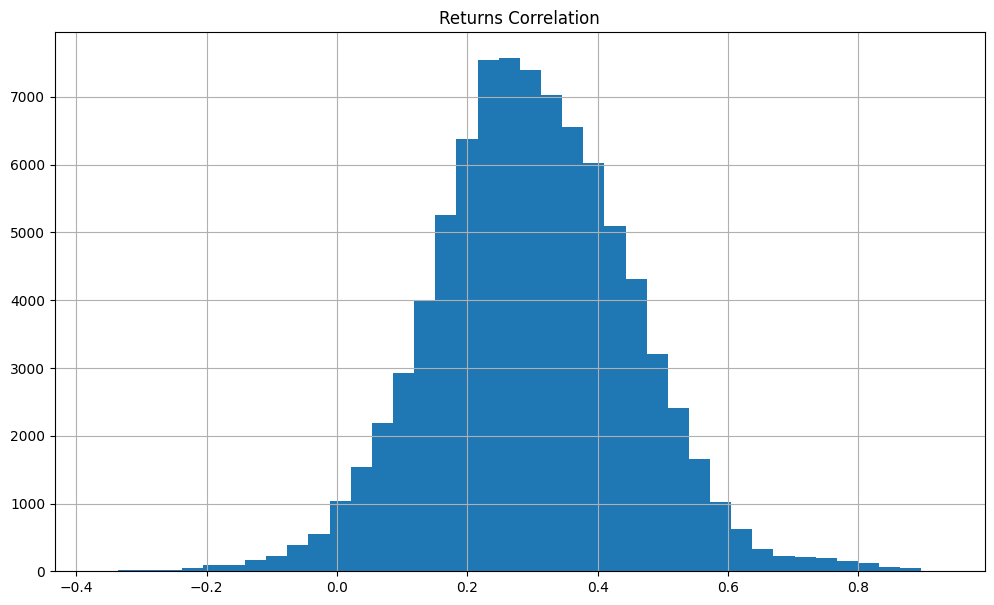

In [132]:
# inspect your data- make some histograms
plt.figure(figsize=(12,7))
all_data.returns_correlation.hist(bins=40)
plt.title('Returns Correlation')

Text(0.5, 1.0, 'Word Similarity')

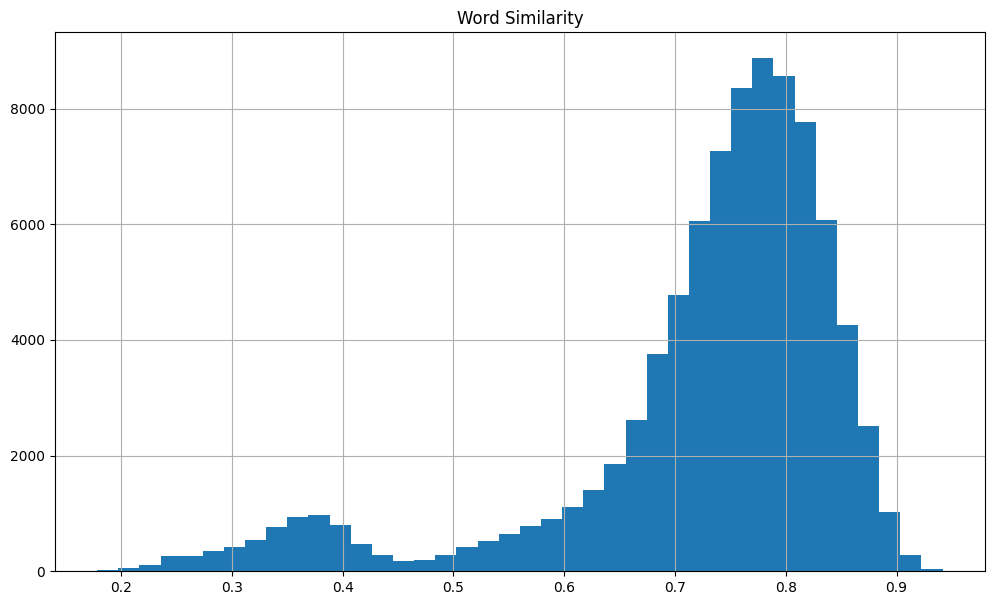

In [133]:
plt.figure(figsize=(12,7))
all_data.word_similarity.hist(bins=40)
plt.title('Word Similarity')

### Cleaning our data
It seems lots of things are identically 0 (no word overlap) or identically 1 (the MD&A section for one company perfectly overlaps itself). We will exclude those

In [134]:
print(all_data.shape) # (88506, 4)

(86730, 4)


In [135]:
# Exclude rows where word_similarity is 0 or 1
cleaned_data = all_data[(all_data['word_similarity'] != 0) & (all_data['word_similarity'] != 1)]
print(cleaned_data.shape)

(86730, 4)


Text(0.5, 1.0, 'Returns Correlation')

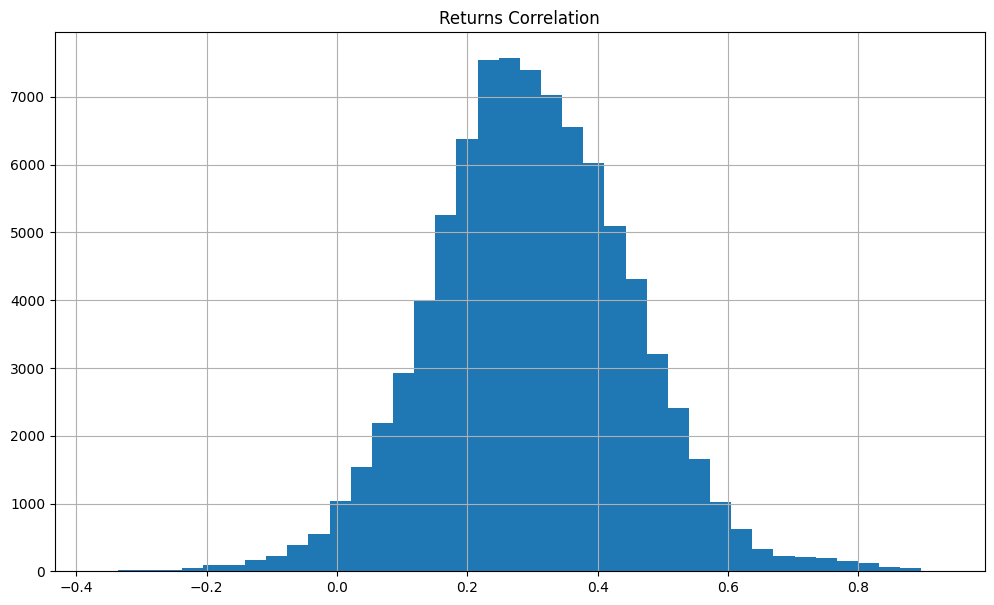

In [136]:
# examine histograms again
plt.figure(figsize=(12,7))
cleaned_data.returns_correlation.hist(bins=40)
plt.title('Returns Correlation')

Text(0.5, 1.0, 'Word Similarity')

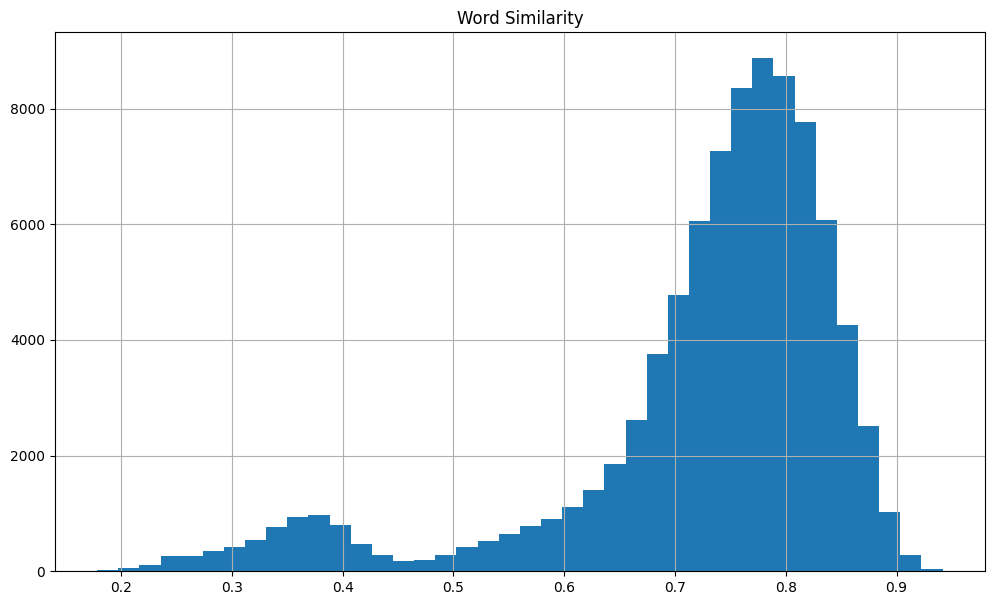

In [137]:
plt.figure(figsize=(12,7))
cleaned_data.word_similarity.hist(bins=40)
plt.title('Word Similarity')

In [138]:
print(cleaned_data['returns_correlation'].corr(cleaned_data['word_similarity']))

0.136933936873183


Lastly, there is a bit of a "hump" at low `word_similarity`

In [139]:
# Filter out rows with low word_similarity values
threshold = 0.45
filtered_data = cleaned_data[cleaned_data['word_similarity'] > threshold]

In [140]:
print(filtered_data['returns_correlation'].corr(filtered_data['word_similarity']))

0.20848120065870823


The contemperaneous correlation is twice as large!

## Part 6: Now, repeat the exercise of predicting future returns correlation

In [141]:
# Split the filtered data into features and target
X = filtered_data[['word_similarity']]
y = filtered_data['returns_correlation']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
reg = LinearRegression()
reg.fit(X_train, y_train)

# Evaluate the model
score = reg.score(X_test, y_test)
coefficients = pd.Series(reg.coef_, index=['word_similarity'])

print(f'Out of sample performance (R^2 score): {score}')
print('Coefficients:')
print(coefficients)

Out of sample performance (R^2 score): 0.043290409206445
Coefficients:
word_similarity    0.400222
dtype: float64


This is about 5 times better than before!
## $ \\ $ 
## Part 7: What will happen if we include last year's returns correlation as a feature

In [142]:
# Get max date of the prices
max_date = prices.index.max()
print(max_date)

2017-12-29 00:00:00


In [143]:
# Calculate last year's returns correlation (2017)
last_year_returns = prices.loc['2017-01-01':'2018-01-01'].pct_change()
print(last_year_returns.head())

                 MMM       ABT      ABBV      ABMD       ACN      ATVI  \
Date                                                                     
2017-01-03       NaN       NaN       NaN       NaN       NaN       NaN   
2017-01-04  0.001516  0.007939  0.014100  0.030082  0.002404  0.019651   
2017-01-05 -0.003421  0.008638  0.007584 -0.008035 -0.014991  0.015525   
2017-01-06  0.002926  0.027204  0.000314  0.005313  0.011392 -0.000791   
2017-01-09 -0.005386 -0.000981  0.006584  0.014642 -0.011178 -0.005539   

                ADBE       AMD       AAP       AES  ...      WLTW      WYNN  \
Date                                                ...                       
2017-01-03       NaN       NaN       NaN       NaN  ...       NaN       NaN   
2017-01-04  0.006378  0.000000  0.008206 -0.008576  ...  0.012334  0.032243   
2017-01-05  0.016996 -0.016623 -0.000698 -0.012976  ...  0.009618  0.012849   
2017-01-06  0.022566  0.007117 -0.013091  0.035933  ...  0.006510  0.010827   
2017-01

/var/folders/tl/1_9jjfjj3wb0nqls4mbmjchw0000gn/T/ipykernel_34104/601945902.py:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  last_year_returns = prices.loc['2017-01-01':'2018-01-01'].pct_change()


In [144]:
# Reshape the returns correlation dataframe
last_year_corr = last_year_returns.corr().stack().reset_index()
last_year_corr.columns = ['ticker1', 'ticker2', 'last_year_corr']
print(last_year_corr.head())

  ticker1 ticker2  last_year_corr
0     MMM     MMM        1.000000
1     MMM     ABT        0.205479
2     MMM    ABBV        0.123827
3     MMM    ABMD        0.079086
4     MMM     ACN        0.238030


In [145]:
# Merge last year's correlation with the current data
data_df = pd.merge(filtered_data, last_year_corr, on=['ticker1', 'ticker2'])
print(data_df.head())
print(data_df.shape)

  ticker1 ticker2  returns_correlation  word_similarity  last_year_corr
0     ACN    ADBE             0.550949         0.797598        0.275787
1     ACN     AMD             0.211802         0.775307        0.073714
2     ACN     AAP             0.238929         0.778956        0.059294
3     ACN     AES             0.348189         0.784401        0.149002
4     ACN     AMG             0.507414         0.709525        0.274935
(80444, 5)


In [149]:
# Include last year's correlation as a feature
# Split the filtered data into features and target
X = data_df[['word_similarity','last_year_corr']]
y = data_df['returns_correlation']
print(X.head())
print(y.head())
print(X.shape, y.shape)

   word_similarity  last_year_corr
0         0.797598        0.275787
1         0.775307        0.073714
2         0.778956        0.059294
3         0.784401        0.149002
4         0.709525        0.274935
0    0.550949
1    0.211802
2    0.238929
3    0.348189
4    0.507414
Name: returns_correlation, dtype: float64
(80444, 2) (80444,)


In [150]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(56310, 2) (24134, 2) (56310,) (24134,)


In [154]:
# Train the model
reg = LinearRegression()
reg.fit(X_train, y_train)

# Evaluate the model
score = reg.score(X_test, y_test)
coefficients = pd.Series(reg.coef_, index=[['word_similarity','last_year_corr']])

print(f'Out of sample performance (R^2 score): {score}')
print('Coefficients:')
print(coefficients)

Out of sample performance (R^2 score): 0.3933717224471853
Coefficients:
word_similarity    0.226637
last_year_corr     0.702846
dtype: float64


Indeed, we do much better, but the word features still help!